<a href="https://colab.research.google.com/github/vedantnib/Machine-Learning/blob/master/8%5DK_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

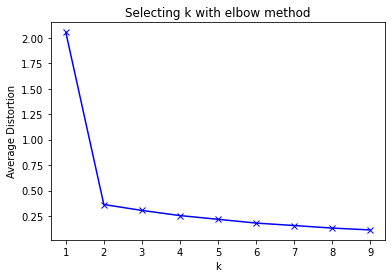

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
cluster1=np.random.uniform(0.5,1.5,(2,10))  #creates numpy array, function format as uniform(lower_bound, upper_bound, size of array)
cluster2=np.random.uniform(3.5,4.5,(2,10))
X=np.hstack((cluster1,cluster2)).T #hstack transforms numpy array into a horizontal array by appending another numpy array and .T is used for transpose

K=range(1,10)
meanadistortions=[]
for k in K:
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(X)
  meanadistortions.append(sum(np.min (cdist(X,kmeans.cluster_centers_,'euclidean'),axis=1))/X.shape[0])
plt.plot(K, meanadistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with elbow method')
plt.show()

We will discuss another performance measure for clustering called the silhoutte effect.
s=ba/max(a,b)
a=distance between instances in clusters
b=mean distance between instance and instances in next closest cluster


Label number: 1
[1 1 1 1 1 1 1 1 1 0 0 0 0 0]
Label number: 2
[1 1 1 1 2 2 2 2 2 0 0 0 0 0]
Label number: 3
[2 2 2 2 1 1 1 1 1 3 0 0 3 0]
Label number: 4
[1 4 4 1 2 2 2 2 2 3 0 0 3 0]
Label number: 5
[3 6 0 3 4 1 4 1 1 5 2 2 5 7]


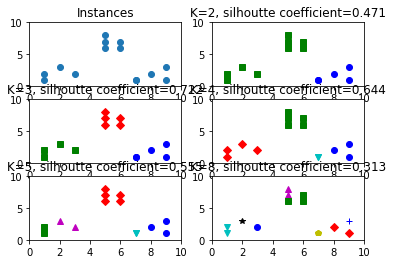

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
plt.subplot(3,2,1) #subplot grid of dimension 3x2 and the first subplot 
x1=np.array([1,2,3,1,5,6,5,5,6,7,8,9,7,9])
x2=np.array([1,3,2,2,8,6,7,6,7,1,2,1,1,3])
X=np.array(list(zip(x1,x2))).reshape((len(x1),2))
plt.xlim([0,10])
plt.ylim([0,10])
plt.title('Instances')
plt.scatter(x1,x2) #A scatter plot is a diagram where each value in the data set is represented by a dot. Executed by plt.scatter() method
colors=['b','g','r','c','m','y','k','b']
markers=['o','s','D','v','^','p','*','+']
tests=[2,3,4,5,8]
subplot_counter=1
ctr=1
for t in tests:
  subplot_counter+=1
  plt.subplot(3,2,subplot_counter)
  kmeans_model=KMeans(n_clusters=t).fit(X)
  print("Label number: {}".format(ctr))
  print(kmeans_model.labels_)
  ctr+=1
  for i,l in enumerate(kmeans_model.labels_):
    plt.plot(x1[i],x2[i], color=colors[l],marker=markers[l],ls='None')
  plt.xlim([0,10])
  plt.ylim([0,10])
  plt.title("K=%s, silhoutte coefficient=%.03f"%(t,metrics.silhouette_score(X,kmeans_model.labels_,metric='euclidean')))
plt.show()